# Scientific Programming in Python (SPiP) - Data Analysis with Pandas


by [Michael Granitzer (michael.granitzer@uni-passau.de)](http://www.mendeley.com/profiles/michael-granitzer/) 

based on the following sources

* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf)
* [Marcel Caraciolo](https://github.com/marcelcaraciolo), 
  [Big Data Tutorial](https://github.com/marcelcaraciolo/big-data-tutorial)


__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)

#Content and Goals

##Content

* What is Pandas?
* Basic Data Structures: Series and Data Frame
* Basic Functions
* Descriptive statistic
* IO Tools
* Visualisation with Pandas

##Goals 
* Multivariate Data processing
* Loading, filtering, analysing data sets
* Basic visualisation/plotting functions


# 1. What is Pandas

*pandas is a Python package providing fast, ﬂexible, and expressive data structures designed to make working with
“relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing
practical, real world data analysis in Python* (http://pandas.pydata.org/) 

Pandas builds on top of Numpy to ease managing heterogeneous data sets.


## 1.1 Data Handled by Pandas

Pandas is well suited for many different kinds of data:

* Tabular data with heterogeneously-typed columns (comparable to EXCEL, R or relational Databases)
* Time series data
*  Matrix data(homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. 


## 1.2 Feature Overview

* Easy handling of missing data (represented as NaN)
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both ag- gregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading and storing data 
* Time series-specific functionality
* Fast realization in Cython



# 2. Pandas Data Structures

Pandas is build around two data structures

* `Series` represent 1 dimensional datasets as subclass of Numpy's ndarray
* `DataFrame` represent 2 dimensional data sets as list of `Series`
* `Panel` represents higher dimensional data as dictionaries of `DataFrame`'s. We do not discuss `Panel`'s here.

For all data structures, labels/indices can be defined per row and column. 

Data alignment is intrinsict, i.e. the link between labels and data will not be broken.



## 2.1. Series: labelled arrays

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, ﬂoating point numbers,Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is
to call:

    Series(data, index=index)
    
`data` may be a dict, a `numpy.ndarray` or a sclar value

**Creating a series**

In [70]:
import numpy as np # we need numpy
import pandas as pd #import pandas


values = np.array([2.0, 1.0, 5.0, 0.97, 3.0, 10.0, 0.0599, 8.0]) #create numpy array
ser = pd.Series(values) # now create series
print ser

0     2.0000
1     1.0000
2     5.0000
3     0.9700
4     3.0000
5    10.0000
6     0.0599
7     8.0000
dtype: float64


In [71]:
#now lets put some index on the data
#indices will be great later on when accessing datas
#indices represent unique identifiers for rows
values = np.array([2.0, 1.0, 5.0, 0.97, 3.0, 10.0, 0.0599, 8.0])
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
ser = pd.Series(data=values, index=labels)#values and labels must have the same dimension
print ser


A     2.0000
B     1.0000
C     5.0000
D     0.9700
E     3.0000
F    10.0000
G     0.0599
H     8.0000
dtype: float64


In [72]:
#craeting a heterogeneous series
movie_rating = {
    'age': 1,
    'gender': 'F',
    'genres': 'Drama',
    'movie_id': 1193,
    'occupation': 10,
    'rating': 5,
    'timestamp': 978300760,
    'title': "One Flew Over the Cuckoo's Nest (1975)",
    'user_id': 1,
    'zip': '48067'
    }
ser = pd.Series(movie_rating)
print ser

age                                                1
gender                                             F
genres                                         Drama
movie_id                                        1193
occupation                                        10
rating                                             5
timestamp                                  978300760
title         One Flew Over the Cuckoo's Nest (1975)
user_id                                            1
zip                                            48067
dtype: object


In [73]:
#show the index
ser.index

Index([u'age', u'gender', u'genres', u'movie_id', u'occupation', u'rating', u'timestamp', u'title', u'user_id', u'zip'], dtype='object')

In [74]:
#show the value
ser.values

array([1, 'F', 'Drama', 1193, 10, 5, 978300760,
       "One Flew Over the Cuckoo's Nest (1975)", 1, '48067'], dtype=object)

**Series Indexing**

Accessing elements in a series can be either done via the number or the index

In [75]:
#use the row number
ser[0]

1

In [76]:
#use the index like in a dict object
ser['gender']

'F'

In [77]:
ser.get_value('gender')

'F'

**Operations between Series with different index objects**

Index objects are unique and used in operations between series

In [78]:
ser_1 = pd.Series(data=[1,3,4], index=['A', 'B', 'C']) #series 1
ser_2 = pd.Series(data=[5,5,5], index=['A', 'G', 'C']) #series 2 but with different indices
print ser_1 + ser_2 #note that if an index not exists, its value is undefined

A     6
B   NaN
C     9
G   NaN
dtype: float64


**A `Series` is like a `Numpy.ndarray`**

It can be used in Numpy functions.

In [79]:
s=pd.Series(np.random.randn(5),index=["a", "b", "c", "d", "e"])
print s
print "epx(s)\n",np.exp(s[:3])
print s

a    1.471399
b   -0.519840
c    0.629875
d   -0.453380
e    1.188491
dtype: float64
epx(s)
a    4.355322
b    0.594616
c    1.877376
dtype: float64
a    1.471399
b   -0.519840
c    0.629875
d   -0.453380
e    1.188491
dtype: float64


**Naming a series**

A series can have a name, i.e. a series label (or if viewed column wise the name of the column)

In [80]:
s.name="Name of my Series"
print s

a    1.471399
b   -0.519840
c    0.629875
d   -0.453380
e    1.188491
Name: Name of my Series, dtype: float64


## 2.2. DataFrame: a Series of Series

The pandas DataFrame is a 2 dimensional labeled data structure with columns of potentially different types. Similar to 
* a spreadsheet 
* relational database table 
* a dictionary of series

**Creating DataFrame's**

DataFrame's can be created from
* dict of Series
* dict of ndarrays
* structured or record arrays
* from a list of dicts
* From a dict of tuples
* From a Series

In [81]:
#dict of series
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print df
print pd.DataFrame(d,index=['d','b','a']) # create data frame with index subset
print
print "Index:", df.index
print "Columns:", df.columns

   one  two
a    1    1
b    2    2
c    3    3
d  NaN    4

[4 rows x 2 columns]
   one  two
d  NaN    4
b    2    2
a    1    1

[3 rows x 2 columns]

Index: Index([u'a', u'b', u'c', u'd'], dtype='object')
Columns: Index([u'one', u'two'], dtype='object')


In [82]:
#dict of lists
d = {'one' : [1., 2., 3., 4.],
    'two' :  [1., 2., 3., 4.]}
print pd.DataFrame(d)

   one  two
0    1    1
1    2    2
2    3    3
3    4    4

[4 rows x 2 columns]


In [83]:
#form a list of dicts
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
print pd.DataFrame(data2)

   a   b   c
0  1   2 NaN
1  5  10  20

[2 rows x 3 columns]


In [84]:
# a dict of tuples
print pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
 ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
 ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
 ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
 ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}}) 

        (a, a)  (a, b)  (a, c)  (b, a)  (b, b)
(A, B)       4       1       5       8      10
(A, C)       3       2       6       7     NaN
(A, D)     NaN     NaN     NaN     NaN       9

[3 rows x 5 columns]


**Column selection, addition, deletion**

DataFrame's work similar to dict objects

In [85]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print df['one']

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64


In [86]:
df['three']=df['one']*df['two']
print df

   one  two  three
a    1    1      1
b    2    2      4
c    3    3      9
d  NaN    4    NaN

[4 rows x 3 columns]


In [87]:
del df['two']
print df

   one  three
a    1      1
b    2      4
c    3      9
d  NaN    NaN

[4 rows x 2 columns]


In [88]:
df['foo']='bar'
print df

   one  three  foo
a    1      1  bar
b    2      4  bar
c    3      9  bar
d  NaN    NaN  bar

[4 rows x 3 columns]


In [89]:
print "Before"
print df
df.insert(1,"bar",df["one"])
print "After"
print df

Before
   one  three  foo
a    1      1  bar
b    2      4  bar
c    3      9  bar
d  NaN    NaN  bar

[4 rows x 3 columns]
After
   one  bar  three  foo
a    1    1      1  bar
b    2    2      4  bar
c    3    3      9  bar
d  NaN  NaN    NaN  bar

[4 rows x 4 columns]


**Indexing/Selection**

<table>
<tr><td>Operation</td><td>Syntax</td><td>Result</td></tr>
<tr><td>Select column</td><td>df[col]</td><td>Series</td></tr>
<tr><td>Select columns by labels</td><td>df[[list of labels]]</td><td>DataFrame</td></tr>
<tr><td>Select row by index</td><td>df.loc[index]</td><td>Series</td></tr>
<tr><td>Select row by integer location</td><td>df.iloc[loc]</td><td>Series</td></tr>
<tr><td>Slice rows</td><td>df[5:10]</td><td>DataFrame</td></tr>
<tr><td>Select rows by boolean vector</td><td>df[bool_vec]</td><td>DataFrame</td></tr>
<tr><td> Flexible slicing</td><td>df.ix[rowselector, columnselector]</td><td>Variable</td></tr>
</table>

In [97]:
df['one']

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

In [98]:
df[2:4]

one  bar  three  foo
c    3    3      9  bar
d  NaN  NaN    NaN  bar

[2 rows x 4 columns]

In [99]:
df[["one","three"]]

one  three
a    1      1
b    2      4
c    3      9
d  NaN    NaN

[4 rows x 2 columns]

In [100]:
df[[False,False,True,True]]

one  bar  three  foo
c    3    3      9  bar
d  NaN  NaN    NaN  bar

[2 rows x 4 columns]

In [101]:
print df
print "Selecting row 'b'"
df.loc['b']

   one  bar  three  foo
a    1    1      1  bar
b    2    2      4  bar
c    3    3      9  bar
d  NaN  NaN    NaN  bar

[4 rows x 4 columns]
Selecting row 'b'


one        2
bar        2
three      4
foo      bar
Name: b, dtype: object

In [102]:
#flexible indexing via .ix method
print df

   one  bar  three  foo
a    1    1      1  bar
b    2    2      4  bar
c    3    3      9  bar
d  NaN  NaN    NaN  bar

[4 rows x 4 columns]


In [103]:
print df.ix[:2,1:2]#gives a data frame

   bar
a    1
b    2

[2 rows x 1 columns]


In [104]:
print df.ix[:2,1] #gives a series

a    1
b    2
Name: bar, dtype: float64


In [105]:
print df.ix[:2,"bar"]#gives a sereies

a    1
b    2
Name: bar, dtype: float64


In [106]:
print df.ix[:2,["bar"]]#gives a data frame

   bar
a    1
b    2

[2 rows x 1 columns]


**Boolean Masking and where()**

As in Numpy, we can use masks for accessing data elements

In [61]:
df2 = pd.DataFrame({'a' : ['one','one','two','three','two','one','six'],
                 'b' : ['x','y','y','x','y','x','x'],
                 'c' : np.random.randn(7)})
print df2
criterion = df2['a'].map(lambda x: x.startswith('t')) #create a criterion using lambda function


       a  b         c
0    one  x -0.194818
1    one  y -0.854617
2    two  y  0.500731
3  three  x -1.871150
4    two  y -0.361554
5    one  x -1.221852
6    six  x  0.567466

[7 rows x 3 columns]


In [62]:
print criterion

0    False
1    False
2     True
3     True
4     True
5    False
6    False
Name: a, dtype: bool


In [64]:
print df2[criterion]

       a  b         c
2    two  y  0.500731
3  three  x -1.871150
4    two  y -0.361554

[3 rows x 3 columns]


In [65]:
#disjunction of two filter criterions using bit-and
df2[(df2['a']=='one')&(df2['b']=='x')]

a  b         c
0  one  x -0.194818
5  one  x -1.221852

[2 rows x 3 columns]

In [60]:
#check for several values over all columns with isin
df3 = pd.DataFrame({'vals': [1, 2, 3, 4], 
                    'ids': ['a', 'b', 'f', 'n'],
                    'ids2': ['a', 'n', 'c', 'n']})

values = ['a', 'b', 1, 3]
print df3.isin(values)

     ids   ids2   vals
0   True   True   True
1   True  False  False
2  False  False   True
3  False  False  False

[4 rows x 3 columns]


In [212]:
#with where we can guarantee the the shape stays the same
s=df2['c']
print s
print s.where(s>0)

0    1.226818
1    1.397274
2    2.285608
3    0.887995
4    0.740792
5    0.964217
6   -0.950748
Name: c, dtype: float64
0    1.226818
1    1.397274
2    2.285608
3    0.887995
4    0.740792
5    0.964217
6         NaN
Name: c, dtype: float64


**Data alignment and arithmetic**

DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [141]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D']) 
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
print df + df2

          A         B         C   D
0 -0.764018  1.721273  3.025988 NaN
1  0.590515 -2.903834  0.619950 NaN
2  0.675780  2.873693  0.133220 NaN
3  0.465546 -0.181611  0.533964 NaN
4  0.456102  0.701952  0.206269 NaN
5  0.824516 -3.376639 -0.036517 NaN
6 -0.810082  1.147010  2.026045 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN

[10 rows x 4 columns]


** Broadcasting behaviour**

When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. 


In [142]:
print df
print "=========================================="
print df.iloc[0]
print "=========================================="
print df-df.iloc[0]

          A         B         C         D
0 -1.017895  1.150594  1.309113  1.515540
1  0.763883 -2.051118 -0.157403  1.485192
2  0.450123 -0.439514  0.921323 -0.307236
3 -1.303320  0.416945 -0.086555  0.335163
4  1.247842  0.074993  0.299225  0.282202
5  0.422874 -2.271704  1.153339 -0.407916
6 -0.106201  0.155699 -0.214184 -1.607625
7  0.298045 -0.006622 -0.970427 -0.063941
8  0.012388  0.953106 -0.665429 -0.081872
9 -0.546150 -0.293723  0.437950  0.991264

[10 rows x 4 columns]
A   -1.017895
B    1.150594
C    1.309113
D    1.515540
Name: 0, dtype: float64
          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  1.781777 -3.201712 -1.466516 -0.030348
2  1.468018 -1.590108 -0.387790 -1.822776
3 -0.285425 -0.733649 -1.395668 -1.180378
4  2.265737 -1.075601 -1.009888 -1.233339
5  1.440769 -3.422299 -0.155774 -1.923456
6  0.911694 -0.994895 -1.523297 -3.123165
7  1.315940 -1.157216 -2.279540 -1.579481
8  1.030283 -0.197488 -1.974542 -1.597412
9  0.471745 -1.

In [143]:
#broadcasting with scalars as in numpy
df*2

A         B         C         D
0 -2.035790  2.301189  2.618226  3.031081
1  1.527765 -4.102235 -0.314806  2.970384
2  0.900246 -0.879027  1.842645 -0.614472
3 -2.606640  0.833891 -0.173110  0.670325
4  2.495685  0.149987  0.598449  0.564404
5  0.845748 -4.543409  2.306679 -0.815831
6 -0.212401  0.311398 -0.428368 -3.215250
7  0.596091 -0.013243 -1.940855 -0.127881
8  0.024777  1.906212 -1.330857 -0.163744
9 -1.092300 -0.587445  0.875900  1.982529

[10 rows x 4 columns]

When working with time series (`TimeSeries`) broadcasting is done column wise. However this function is **deprecated**

In [144]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
print df

                   A         B         C
2000-01-01 -0.717866  2.164891 -2.035907
2000-01-02  2.489434  1.930195 -0.120404
2000-01-03 -0.543325  0.756656 -0.399047
2000-01-04 -1.603618  1.367963 -0.547262
2000-01-05 -0.792466 -1.621475 -0.268029
2000-01-06  1.968081 -1.720272 -0.109728
2000-01-07  0.340463  0.417802  0.050014
2000-01-08  1.809002  1.472323  1.247206

[8 rows x 3 columns]


In [145]:
print df - df['A']

            A         B         C
2000-01-01  0  2.882758 -1.318041
2000-01-02  0 -0.559239 -2.609837
2000-01-03  0  1.299982  0.144278
2000-01-04  0  2.971581  1.056356
2000-01-05  0 -0.829009  0.524437
2000-01-06  0 -3.688353 -2.077809
2000-01-07  0  0.077339 -0.290450
2000-01-08  0 -0.336679 -0.561796

[8 rows x 3 columns]


**Transposing a Data Frame**


In [146]:
print df[:5]
print df[:5].T

                   A         B         C
2000-01-01 -0.717866  2.164891 -2.035907
2000-01-02  2.489434  1.930195 -0.120404
2000-01-03 -0.543325  0.756656 -0.399047
2000-01-04 -1.603618  1.367963 -0.547262
2000-01-05 -0.792466 -1.621475 -0.268029

[5 rows x 3 columns]
   2000-01-01  2000-01-02  2000-01-03  2000-01-04  2000-01-05
A   -0.717866    2.489434   -0.543325   -1.603618   -0.792466
B    2.164891    1.930195    0.756656    1.367963   -1.621475
C   -2.035907   -0.120404   -0.399047   -0.547262   -0.268029

[3 rows x 5 columns]


**Compatibility with Numpy**

Given numeric values, numpy element wise functions can be used

In [147]:
print df
print np.exp(df)

                   A         B         C
2000-01-01 -0.717866  2.164891 -2.035907
2000-01-02  2.489434  1.930195 -0.120404
2000-01-03 -0.543325  0.756656 -0.399047
2000-01-04 -1.603618  1.367963 -0.547262
2000-01-05 -0.792466 -1.621475 -0.268029
2000-01-06  1.968081 -1.720272 -0.109728
2000-01-07  0.340463  0.417802  0.050014
2000-01-08  1.809002  1.472323  1.247206

[8 rows x 3 columns]
                    A         B         C
2000-01-01   0.487792  8.713655  0.130562
2000-01-02  12.054450  6.890855  0.886563
2000-01-03   0.580814  2.131139  0.670959
2000-01-04   0.201167  3.927343  0.578532
2000-01-05   0.452727  0.197607  0.764885
2000-01-06   7.156929  0.179017  0.896078
2000-01-07   1.405598  1.518620  1.051285
2000-01-08   6.104349  4.359349  3.480604

[8 rows x 3 columns]


## 3 Basic Functionality

* Accessing head and tails via `DataFrame.head` and `DataFrame.tail`
* Explicit arithmetic operations:  `DataFrame.add`, `DataFrame.sub` etc. allow to control broadcasting and value filling
* DataFrame comparators: `DataFrame.gt`, `DataFrame.ne` etc.
* Boolean reductions: `DataFrame.all()`, `DataFrame.any()``



## 3.1 Head and Tail

Viewing long series/data frames

In [148]:
long_series = pd.Series(np.random.randn(1000))
print long_series.head()

0   -0.741795
1    0.390169
2    1.195150
3    0.624537
4   -0.801417
dtype: float64


In [149]:
print long_series.tail()

995    1.138189
996   -1.034913
997   -1.367537
998   -0.559639
999   -0.637067
dtype: float64


In [151]:
print long_series# see reduce printing behaviour

0    -0.741795
1     0.390169
2     1.195150
3     0.624537
4    -0.801417
5     2.015026
6     1.132116
7    -1.159619
8     1.831700
9    -1.476808
10   -0.308686
11   -0.251019
12   -0.844418
13   -0.624416
14   -1.047043
...
985    0.068389
986   -0.861972
987    0.845639
988   -0.851000
989    0.454455
990    0.609863
991    1.729993
992    1.205735
993    0.161924
994   -1.667224
995    1.138189
996   -1.034913
997   -1.367537
998   -0.559639
999   -0.637067
Length: 1000, dtype: float64


#4. Descriptive Statistics

Descriptive Statistics sumarizes the underlying distribution of data values through statistical values like mean, variance etc.

##4.1 Basic Functions

<table>
<tr><td>Function</td><td>Description</td>
<tr><td>count</td><td>Number of non-null observations</td>
<tr><td>sum</td><td>Sum of values</td>
<tr><td>mean</td><td>Mean of values</td>
<tr><td>mad</td><td>Mean absolute deviation</td>
<tr><td>median</td><td>Arithmetic median of values</td>
<tr><td>min</td><td>Minimum</td>
<tr><td>max</td><td>Maximum</td>
<tr><td>mode</td><td>Mode</td>
<tr><td>abs</td><td>Absolute Value</td>
<tr><td>prod</td><td>Product of values</td>
<tr><td>std</td><td>Unbiased standard deviation</td>
<tr><td>var</td><td>Unbiased variance</td>
<tr><td>skew</td><td>Unbiased skewness (3rd moment)</td>
<tr><td>kurt</td><td>Unbiased kurtosis (4th moment)</td>
<tr><td>quantile</td><td>Sample quantile (value at %)</td>
<tr><td>cumsum</td><td>Cumulative sum</td>
<tr><td>cumprod</td><td>Cumulative product</td>
<tr><td>cummax</td><td>Cumulative maximum</td>
<tr><td>cummin</td><td>Cumulative minimum</td>
</table>


In [152]:
print df

                   A         B         C
2000-01-01 -0.717866  2.164891 -2.035907
2000-01-02  2.489434  1.930195 -0.120404
2000-01-03 -0.543325  0.756656 -0.399047
2000-01-04 -1.603618  1.367963 -0.547262
2000-01-05 -0.792466 -1.621475 -0.268029
2000-01-06  1.968081 -1.720272 -0.109728
2000-01-07  0.340463  0.417802  0.050014
2000-01-08  1.809002  1.472323  1.247206

[8 rows x 3 columns]


In [155]:
#some examples
print df.max()
print "========================================"
print df.max(axis=1)

A    2.489434
B    2.164891
C    1.247206
dtype: float64
2000-01-01    2.164891
2000-01-02    2.489434
2000-01-03    0.756656
2000-01-04    1.367963
2000-01-05   -0.268029
2000-01-06    1.968081
2000-01-07    0.417802
2000-01-08    1.809002
Freq: D, dtype: float64


##4.2 Describe

`describe` summarizes a DataFrame

In [157]:
df.describe()

A         B         C
count  8.000000  8.000000  8.000000
mean   0.368713  0.596010 -0.272895
std    1.529779  1.509269  0.899546
min   -1.603618 -1.720272 -2.035907
25%   -0.736516 -0.092017 -0.436101
50%   -0.101431  1.062310 -0.194216
75%    1.848771  1.586791 -0.069793
max    2.489434  2.164891  1.247206

[8 rows x 3 columns]

## 4.3 Index  of min and max

In [158]:
print df

                   A         B         C
2000-01-01 -0.717866  2.164891 -2.035907
2000-01-02  2.489434  1.930195 -0.120404
2000-01-03 -0.543325  0.756656 -0.399047
2000-01-04 -1.603618  1.367963 -0.547262
2000-01-05 -0.792466 -1.621475 -0.268029
2000-01-06  1.968081 -1.720272 -0.109728
2000-01-07  0.340463  0.417802  0.050014
2000-01-08  1.809002  1.472323  1.247206

[8 rows x 3 columns]


In [160]:
print df.idxmax(axis=0)
print "============================"
print df.idxmin(axis=0)
print "============================"
print df.idxmax(axis=1)
print "============================"
print df.idxmin(axis=1)


A   2000-01-02
B   2000-01-01
C   2000-01-08
dtype: datetime64[ns]
A   2000-01-04
B   2000-01-06
C   2000-01-01
dtype: datetime64[ns]
2000-01-01    B
2000-01-02    A
2000-01-03    B
2000-01-04    B
2000-01-05    C
2000-01-06    A
2000-01-07    B
2000-01-08    A
Freq: D, dtype: object
2000-01-01    C
2000-01-02    C
2000-01-03    A
2000-01-04    A
2000-01-05    B
2000-01-06    B
2000-01-07    C
2000-01-08    C
Freq: D, dtype: object


##4.4 Histogram

`value_counts()`allows to count the histogram

In [163]:
data = np.random.randint(0, 7, size=50)
s = pd.Series(data)
print s.value_counts()

0    12
2     9
5     8
6     7
4     7
3     4
1     3
dtype: int64


# 5 Group By

Pandas supports grouping data frames for particular columns similar to a SQL group by clause.

In [216]:
help(df.groupby)

Help on method groupby in module pandas.core.generic:

groupby(self, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False) method of pandas.core.frame.DataFrame instance
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns
    
    Parameters
    ----------
    by : mapping function / list of functions, dict, Series, or tuple /
        list of column names.
        Called on each element of the object index to determine the groups.
        If a dict or Series is passed, the Series or dict VALUES will be
        used to determine the groups
    axis : int, default 0
    level : int, level name, or sequence of such, default None
        If the axis is a MultiIndex (hierarchical), group by a particular
        level or levels
    as_index : boolean, default True
        For aggregated output, return object with group labels as the
        index. Only relevant for DataFram

In [213]:
df2 = pd.DataFrame({'a' : ['one','one','two','three','two','one','six'],
                 'b' : ['x','y','y','x','y','x','x'],
                 'c' : np.random.randn(7)})
print df2


       a  b         c
0    one  x -1.115270
1    one  y -0.391332
2    two  y  1.513740
3  three  x  0.606864
4    two  y -0.390764
5    one  x -0.679077
6    six  x  0.562380

[7 rows x 3 columns]


In [219]:
print df2.groupby('a') #creates a groupby object

In [220]:
#gropuing requires an aggregate function
print df2.groupby('a').mean() #creates a groupby object

              c
a              
one   -0.728560
six    0.562380
three  0.606864
two    0.561488

[4 rows x 1 columns]


In [223]:
#works on multiple levels
print df2.groupby(['a','b']).mean()

                c
a     b          
one   x -0.897174
      y -0.391332
six   x  0.562380
three x  0.606864
two   y  0.561488

[5 rows x 1 columns]


# 6. IO Tools

The Pandas I/O api is a set of top level reader functions accessed like `pd.read_csv()` that generally return a pandas object.
* read_csv
* read_excel
* read_hdf
* read_sql
* read_json
* read_msgpack (experimental) 
* read_html
* read_gbq (experimental)
* read_stata
* read_clipboard
* read_pickle

The corresponding writer functions are object methods that are accessed like df.to_csv() • to_csv
* to_excel
* to_hdf
* to_sql
* to_json
* to_msgpack (experimental) • to_html
* to_gbq (experimental) • to_stata
* to_clipboard
* to_pickle


** Open Data Access **

Further, pandas supports some open data APIs, namely

* Yahoo! Finance
* Google Finance
* St. Louis FED (FRED)
* Kenneth French’s data library 
* World Bank

#6.1 Loading the Weather Data from the CSV

In this example we load the weather datafrom the data directory ( "data\weather_data.csv") 

In [227]:
#! executes a shell command
!ls data

cordisfp7noabstracts.xls weather_data.csv


In [229]:
!cat data/weather_data.csv

Day,outlook,temperature,humidity,windy,play
1,sunny,85,85,false,no
2,sunny,80,90,true,no
3,overcast,83,86,false,yes
4,rainy,70,96,false,yes
5,rainy,68,80,false,yes
6,rainy,65,70,true,no
7,overcast,64,65,true,yes


In [231]:
df = pd.read_csv("data/weather_data.csv")
print df

   Day   outlook  temperature  humidity  windy play
0    1     sunny           85        85  False   no
1    2     sunny           80        90   True   no
2    3  overcast           83        86  False  yes
3    4     rainy           70        96  False  yes
4    5     rainy           68        80  False  yes
5    6     rainy           65        70   True   no
6    7  overcast           64        65   True  yes

[7 rows x 6 columns]


In [107]:
#use help to see the parameters 
pd.read_csv?

## Exercise 6.1. Analysing New York City Open Data with Pandas

Go to the exercise folder and conduct exercise 6.1.

# 7 Visualisations with Pandas

Pandas has a number of build in visualisations using data frames.

The default visualisations are build on top of mathplotlib (see  [Mathplotlib in a Nutshell](http://nbviewer.ipython.org/urls/raw.github.com/mgrani/LODA-lecture-notes-on-data-analysis/master/1.SP-in-Python/SPiP-5-Matplotlib.ipynb) for an introduction to Mathplotlib)

Hence, `mathplotlib` has to be imported

In [2]:
import matplotlib.pyplot as plt

In [6]:
#to enable nicer plots
pd.options.display.mpl_style = 'default'

In [3]:
#and enable to include plots inline in HTML
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 7.1 Basic Plotting: using `plot``

The plot method on Series and DataFrame is just a simple wrapper around `plt.plot()`from the mathplotlib library
￼￼

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum() #cumulative sum
ts.plot()
ts.cumsum?

NameError: name 'pd' is not defined

In [1]:
#Plotting a dataframe
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df=df.cumsum() #cumulative sum to make the plot visually more robust
df.plot()

NameError: name 'pd' is not defined

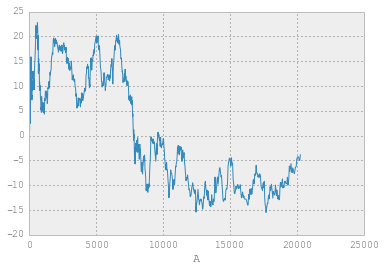

In [16]:
df['A']=np.abs(df['A']).cumsum() # make A ever increasing
df.plot(x='A',y='B') #Plot A vs. B

#7.2. Changing the plot `kind`

The keyword argument `kind` of the plot function allows to change the plot type.

Available types are:

* `bar` or  `barh` for bar plots
* `kde` or `density` for density plots
* `area` for area plots
* `scatter` for scater plots
* `hexbin` for hexagonal bin plots
* `pie` for pie pots

In addition to these `kind`'s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface.

Finally, there are several plotting functions in `pandas.tools.plotting`:
* Scatter Matrix
* Andrews Curves
* Parallel Coordinates
* Lag Plot
* Autocorrelation Plot
* Bootstrap Plot
* RadViz


#### Bar Plots

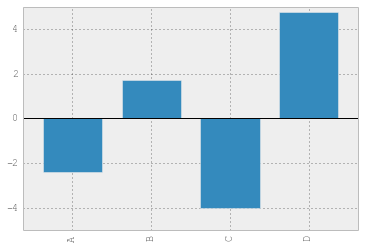

In [19]:
df.ix[5].plot(kind='bar'); plt.axhline(0, color='k') 

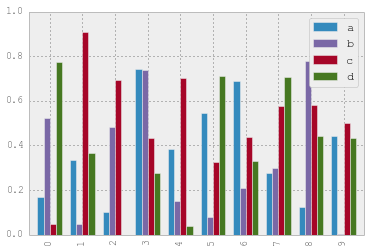

In [22]:
#data frame
df2 = pd.DataFrame(rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar');

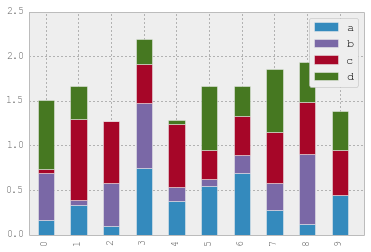

In [23]:
#stacked
df2.plot(kind='bar',stacked=True)

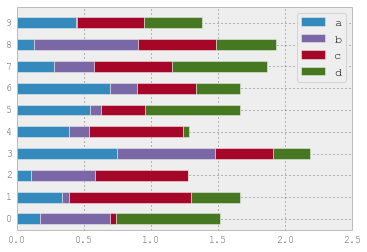

In [24]:
#stacked horizontal
df2.plot(kind='barh',stacked=True)

#### Histograms

2000-01-01         NaN
2000-01-02   -0.411979
2000-01-03   -0.753379
2000-01-04   -1.136846
2000-01-05    0.222089
2000-01-06   -0.016499
2000-01-07   -0.405356
2000-01-08   -0.371212
2000-01-09    1.994146
2000-01-10   -0.472911
2000-01-11    2.086219
2000-01-12   -0.113366
2000-01-13   -0.237999
2000-01-14    0.859727
2000-01-15   -0.410979
...
2002-09-12    0.250315
2002-09-13    0.109903
2002-09-14    1.924514
2002-09-15    0.970781
2002-09-16    0.121563
2002-09-17   -1.407579
2002-09-18   -0.728307
2002-09-19   -0.052168
2002-09-20   -0.959154
2002-09-21    0.895658
2002-09-22   -1.271050
2002-09-23    0.351894
2002-09-24    1.911881
2002-09-25   -0.376373
2002-09-26   -0.002231
Freq: D, Name: A, Length: 1000


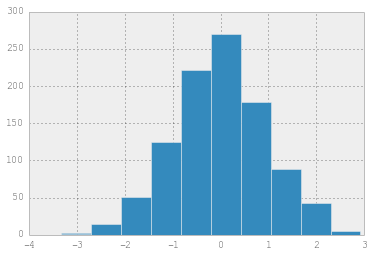

In [30]:
#histogram of a series. Note we apply diff to undo the cumsum before
print df['A'].diff()
df['A'].diff().hist()

array([[<matplotlib.axes.AxesSubplot object at 0x114afdb90>,
        <matplotlib.axes.AxesSubplot object at 0x114c54710>]], dtype=object)

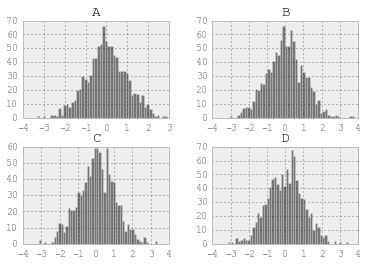

In [31]:
#histogram of a Data Frame. Note we apply diff to undo the cumsum before
df.diff().hist(color='k', alpha=0.5, bins=50)

#### Box Plots


          0         1         2         3         4
0  0.666224  0.393628  0.222618  0.316855  0.097431
1  0.243752  0.459601  0.721334  0.452259  0.593016
2  0.113163  0.714574  0.743872  0.848850  0.697727
3  0.260933  0.112996  0.646506  0.991783  0.359118
4  0.163957  0.727194  0.748078  0.388492  0.200461
5  0.265430  0.903168  0.075349  0.490278  0.121176
6  0.747577  0.256656  0.599358  0.729504  0.516326
7  0.033787  0.767497  0.256746  0.372445  0.880377
8  0.282964  0.238085  0.526137  0.540515  0.147123
9  0.825188  0.378844  0.500666  0.813328  0.628897

[10 rows x 5 columns]


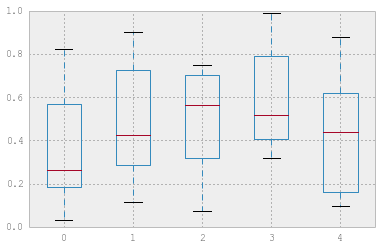

In [34]:
df = pd.DataFrame(rand(10,5))
print df
bp = df.boxplot()

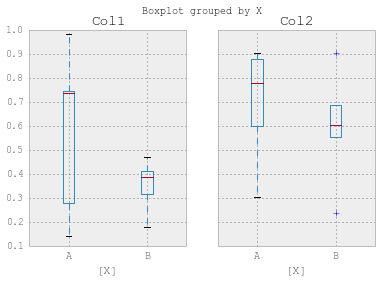

In [37]:
df = pd.DataFrame(rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
#group boxplot by a series
bp = df.boxplot(by='X')

#### Area Plot

In [44]:
#note only available in pandas 0.14
print pd.__version__
df = pd.DataFrame(rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='area')

ValueError: Invalid chart type given area

#### Scatter Matrix Plot


array([[<matplotlib.axes.AxesSubplot object at 0x114d6f950>,
        <matplotlib.axes.AxesSubplot object at 0x1151ed4d0>]], dtype=object)

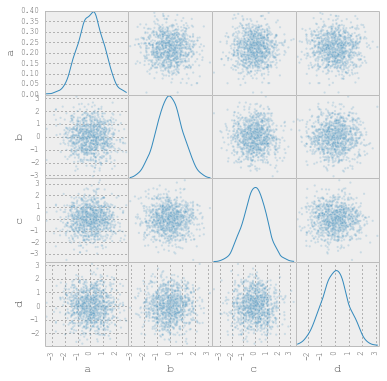

In [46]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


#### Density Plots

Plot an estimated probability density function (PDE)

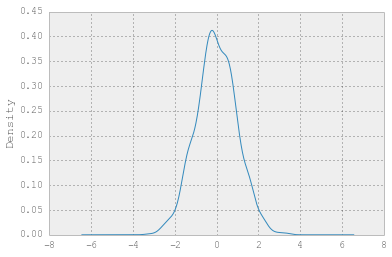

In [47]:
ser = pd.Series(numpy.random.randn(1000))
ser.plot(kind='kde')

#### Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

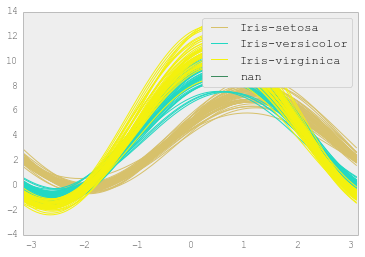

In [54]:
from pandas.tools.plotting import andrews_curves
data = pd.read_csv('data/iris.dat')
#print data
andrews_curves(data, 'Name')

#### Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

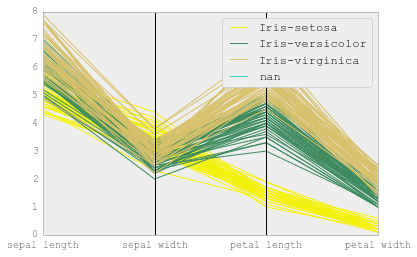

In [55]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(data, 'Name')

#### Rad Viz

RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

ValueError: max() arg is an empty sequence

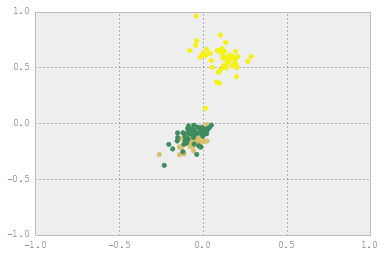

In [56]:
from pandas.tools.plotting import radviz
radviz(data, 'Name')

### Exercise 6.1.c: Visual Analysis of Complaints in NYC

Time to try it out by yourself. Go to to the exercise and try to solve it.

# References

* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [Tutorials and Cookbooks] (http://pandas.pydata.org/pandas-docs/stable/tutorials.html)